### Nama : Gian Maxmillian Firdaus


## Analisis Data Mortality dan Vaksinasi Dunia yang diakibatkan oleh Covid-19
------------------------------------------

### Tahap 1: Load Modules

In [162]:
import pandas as pd 
import numpy as np 
import seaborn as sns
# import Library SelectKBest
from sklearn.feature_selection import SelectKBest
# import Library chi kuadrat/squared
from sklearn.feature_selection import chi2, f_regression
import matplotlib.pyplot as plt 

### Tahap 2: Import data set covid-19

In [163]:
# Data on COVID-19 (coronavirus) by Our World in Data (https://ourworldindata.org/coronavirus-source-data)
df = pd.read_csv("new_deaths_per_million.csv") # Nilai dalam skala 1 juta.
df

,date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,0.002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2021-11-20,0.755,0.050,0.075,2.088,0.045,0.000,0.029,0.00,0.307,...,1.079,0.574,0.088,0.0,NaN,0.244,1.090,0.098,0.0,0.000
669,2021-11-21,0.559,0.050,0.082,0.000,0.090,0.000,0.000,0.00,0.066,...,0.947,0.861,0.059,0.0,NaN,0.209,0.774,0.000,0.0,0.000
670,2021-11-22,0.918,0.000,0.086,4.873,0.112,0.000,0.000,91.16,0.110,...,1.112,0.000,0.088,0.0,NaN,0.314,1.935,0.033,0.0,0.000
671,2021-11-23,1.020,-1.506,0.133,1.392,0.090,0.000,0.000,0.00,0.724,...,1.131,0.287,0.118,0.0,NaN,0.000,1.701,0.098,0.0,0.000


In [164]:
# info struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Columns: 209 entries, date to Zimbabwe
dtypes: float64(208), object(1)
memory usage: 1.1+ MB


In [165]:
# Ukuran file
df.shape

(673, 209)

In [166]:
# Statistik data awal sebelum di bersihkan
df.describe()

,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
count,673.000000,612.000000,651.000000,624.000000,623.000000,613.000000,606.000000,597.000000,627.000000,609.000000,...,673.000000,607.000000,608.000000,218.000000,0.0,608.000000,482.000000,574.000000,602.000000,612.000000
mean,0.973169,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,1.276355,2.892521,0.067036,0.014587,NaN,0.292072,0.512311,0.111003,0.321997,0.509190
std,0.493020,0.509044,0.194072,1.777059,0.176998,7.873390,0.105605,9.388654,4.705107,4.004516,...,0.691864,5.279645,0.069714,0.215377,NaN,0.260646,1.149529,0.169775,0.663677,1.066345
min,0.000000,-1.506000,-0.049000,0.000000,0.000000,0.000000,-0.088000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,-0.209000,-0.010000,0.000000,0.000000,0.000000
25%,0.682000,0.025000,0.133000,0.348000,0.112000,0.000000,0.000000,0.000000,0.724000,1.011000,...,0.918000,0.000000,0.000000,0.000000,NaN,0.105000,0.000000,0.000000,0.000000,0.000000
50%,0.940000,0.100000,0.202000,1.392000,0.179000,0.000000,0.059000,0.000000,3.026000,2.695000,...,1.294000,0.287000,0.059000,0.000000,NaN,0.209000,0.000000,0.066000,0.053000,0.066000
75%,1.300000,0.301000,0.304000,2.437000,0.247000,0.000000,0.118000,0.000000,5.942000,6.064000,...,1.745000,2.295000,0.118000,0.000000,NaN,0.488000,0.267000,0.131000,0.264000,0.398000
max,2.287000,3.991000,1.102000,7.310000,1.098000,77.565000,0.884000,121.546000,73.477000,23.584000,...,3.090000,25.250000,0.265000,3.180000,NaN,1.219000,8.190000,1.705000,3.805000,7.090000


In [167]:
#cek nilai yang hilang / missing values di dalam data
print(df.isna().sum())

date             0
World            0
Afghanistan     61
Africa          22
Albania         49
              ... 
Venezuela       65
Vietnam        191
Yemen           99
Zambia          71
Zimbabwe        61
Length: 209, dtype: int64


In [168]:
# mengganti missing value dengan mean(), kemudian masukkan ke variabel
df = df.fillna(df.mean())
df

,date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.000,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,...,0.000,2.892521,0.067036,0.014587,NaN,0.292072,0.512311,0.111003,0.321997,0.50919
1,2020-01-23,0.000,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,...,0.000,2.892521,0.067036,0.014587,NaN,0.292072,0.512311,0.111003,0.321997,0.50919
2,2020-01-24,0.001,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,...,0.003,2.892521,0.067036,0.014587,NaN,0.292072,0.512311,0.111003,0.321997,0.50919
3,2020-01-25,0.002,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,...,0.006,2.892521,0.067036,0.014587,NaN,0.292072,0.512311,0.111003,0.321997,0.50919
4,2020-01-26,0.002,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,...,0.006,2.892521,0.067036,0.014587,NaN,0.292072,0.512311,0.111003,0.321997,0.50919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2021-11-20,0.755,0.050000,0.075000,2.088000,0.045000,0.000000,0.029000,0.000000,0.307000,...,1.079,0.574000,0.088000,0.000000,NaN,0.244000,1.090000,0.098000,0.000000,0.00000
669,2021-11-21,0.559,0.050000,0.082000,0.000000,0.090000,0.000000,0.000000,0.000000,0.066000,...,0.947,0.861000,0.059000,0.000000,NaN,0.209000,0.774000,0.000000,0.000000,0.00000
670,2021-11-22,0.918,0.000000,0.086000,4.873000,0.112000,0.000000,0.000000,91.160000,0.110000,...,1.112,0.000000,0.088000,0.000000,NaN,0.314000,1.935000,0.033000,0.000000,0.00000
671,2021-11-23,1.020,-1.506000,0.133000,1.392000,0.090000,0.000000,0.000000,0.000000,0.724000,...,1.131,0.287000,0.118000,0.000000,NaN,0.000000,1.701000,0.098000,0.000000,0.00000


In [169]:
# Negara vatican di ubah dan NaN ke angka 0
df = df.fillna(0)
df

,date,World,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,...,Upper middle income,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.000,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,...,0.000,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
1,2020-01-23,0.000,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,...,0.000,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
2,2020-01-24,0.001,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,...,0.003,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
3,2020-01-25,0.002,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,...,0.006,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
4,2020-01-26,0.002,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,...,0.006,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2021-11-20,0.755,0.050000,0.075000,2.088000,0.045000,0.000000,0.029000,0.000000,0.307000,...,1.079,0.574000,0.088000,0.000000,0.0,0.244000,1.090000,0.098000,0.000000,0.00000
669,2021-11-21,0.559,0.050000,0.082000,0.000000,0.090000,0.000000,0.000000,0.000000,0.066000,...,0.947,0.861000,0.059000,0.000000,0.0,0.209000,0.774000,0.000000,0.000000,0.00000
670,2021-11-22,0.918,0.000000,0.086000,4.873000,0.112000,0.000000,0.000000,91.160000,0.110000,...,1.112,0.000000,0.088000,0.000000,0.0,0.314000,1.935000,0.033000,0.000000,0.00000
671,2021-11-23,1.020,-1.506000,0.133000,1.392000,0.090000,0.000000,0.000000,0.000000,0.724000,...,1.131,0.287000,0.118000,0.000000,0.0,0.000000,1.701000,0.098000,0.000000,0.00000


In [170]:
# Membersihkan kolom yang tidak diperlukan
df=df.drop(columns=['World', 'Low income','Lower middle income','Upper middle income','High income'])
df

,date,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
1,2020-01-23,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
2,2020-01-24,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
3,2020-01-25,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
4,2020-01-26,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,2021-11-20,0.050000,0.075000,2.088000,0.045000,0.000000,0.029000,0.000000,0.307000,13.813000,...,0.967000,0.574000,0.088000,0.000000,0.0,0.244000,1.090000,0.098000,0.000000,0.00000
669,2021-11-21,0.050000,0.082000,0.000000,0.090000,0.000000,0.000000,0.000000,0.066000,8.423000,...,0.315000,0.861000,0.059000,0.000000,0.0,0.209000,0.774000,0.000000,0.000000,0.00000
670,2021-11-22,0.000000,0.086000,4.873000,0.112000,0.000000,0.000000,91.160000,0.110000,10.107000,...,3.683000,0.000000,0.088000,0.000000,0.0,0.314000,1.935000,0.033000,0.000000,0.00000
671,2021-11-23,-1.506000,0.133000,1.392000,0.090000,0.000000,0.000000,0.000000,0.724000,16.172000,...,4.283000,0.287000,0.118000,0.000000,0.0,0.000000,1.701000,0.098000,0.000000,0.00000


In [171]:
# Statistik data setelah dibersihkan
df.describe()

,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Asia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,...,673.000000,673.000000,673.000000,673.000000,673.0,673.000000,673.000000,673.000000,673.000000,673.000000
mean,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,0.384403,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.509190
std,0.485390,0.190869,1.711044,0.170286,7.513682,0.100202,8.841824,4.541215,3.809055,0.315579,...,2.763806,5.013677,0.066256,0.122389,0.0,0.247720,0.972541,0.156771,0.627638,1.016796
min,-1.506000,-0.049000,0.000000,0.000000,0.000000,-0.088000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,-0.209000,-0.010000,0.000000,0.000000,0.000000
25%,0.025000,0.135000,0.348000,0.112000,0.000000,0.029000,0.000000,0.811000,1.348000,0.187000,...,1.568000,0.000000,0.000000,0.000000,0.0,0.105000,0.000000,0.000000,0.000000,0.000000
50%,0.126000,0.206000,1.392000,0.179000,0.000000,0.059000,0.000000,3.311000,3.369000,0.314000,...,3.106000,0.574000,0.059000,0.014587,0.0,0.244000,0.020000,0.066000,0.053000,0.133000
75%,0.299644,0.300000,2.437000,0.224000,0.000000,0.118000,0.000000,5.635000,5.391000,0.470000,...,4.920000,2.892521,0.118000,0.014587,0.0,0.418000,0.512311,0.131000,0.321997,0.509190
max,3.991000,1.102000,7.310000,1.098000,77.565000,0.884000,121.546000,73.477000,23.584000,1.822000,...,13.343000,25.250000,0.265000,3.180000,0.0,1.219000,8.190000,1.705000,3.805000,7.090000


In [172]:
df.head()

,date,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States,Uruguay,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
0,2020-01-22,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
1,2020-01-23,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
2,2020-01-24,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
3,2020-01-25,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919
4,2020-01-26,0.299644,0.248301,1.708502,0.217096,2.762705,0.084066,1.985069,4.072676,4.082274,...,3.667918,2.892521,0.067036,0.014587,0.0,0.292072,0.512311,0.111003,0.321997,0.50919


In [173]:
# Ambil lima sample negara: China, India dan Indonesia, United States, Germany
#independent columns --> China, India dan Indonesia, United States, Germany
X = df.iloc[:,[38,69,82,83,194]]
y = df.iloc[:,[0]]

In [146]:
X

,China,Germany,India,Indonesia,United States
0,0.007549,0.135613,0.101662,0.111350,0.274895
1,0.003352,0.135613,0.101662,0.111350,0.274895
2,0.008939,0.135613,0.101662,0.111350,0.274895
3,0.014525,0.135613,0.101662,0.111350,0.274895
4,0.013408,0.135613,0.101662,0.111350,0.274895
...,...,...,...,...,...
668,0.002235,0.088417,0.042698,0.006812,0.072472
669,0.002235,0.082381,0.034007,0.005343,0.023608
670,0.002235,0.216366,0.032118,0.002404,0.276025
671,0.002235,0.232307,0.059513,0.004408,0.320992


In [174]:
# Tranform dataframe from vertical to horizontal
y1 = y.T
X1 = X.T
X1

,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
China,0.004756,0.001000,0.006000,0.011000,0.010000,0.018000,0.034000,0.001000,0.026000,0.029000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Germany,1.906350,1.906350,1.906350,1.906350,1.906350,1.906350,1.906350,1.906350,1.906350,1.906350,...,3.170,3.480,3.170,2.467,2.884,0.882,0.751,3.659,4.005,4.172
India,0.537099,0.537099,0.537099,0.537099,0.537099,0.537099,0.537099,0.537099,0.537099,0.537099,...,0.141,0.216,0.337,0.329,0.192,0.225,0.179,0.169,0.314,0.284
Indonesia,0.833678,0.833678,0.833678,0.833678,0.833678,0.833678,0.833678,0.833678,0.833678,0.833678,...,0.040,0.054,0.047,0.040,0.018,0.051,0.040,0.018,0.033,0.047
United States,3.667918,3.667918,3.667918,3.667918,3.667918,3.667918,3.667918,3.667918,3.667918,3.667918,...,3.818,3.839,4.872,3.791,5.996,0.967,0.315,3.683,4.283,4.905


In [175]:
X1.shape

(5, 673)

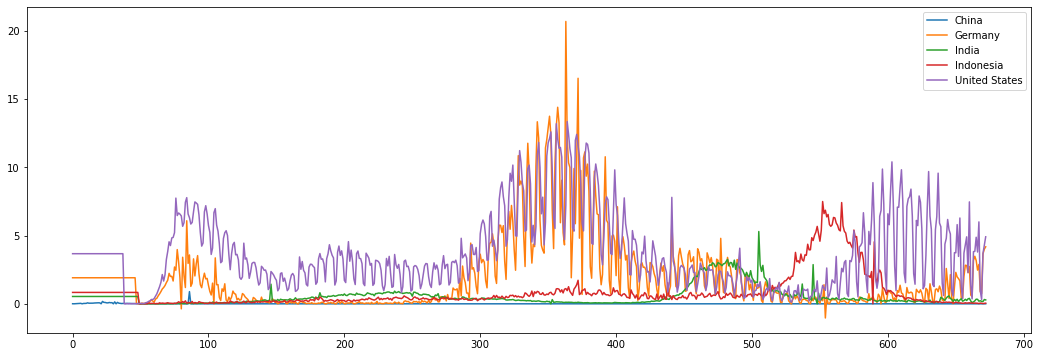

In [178]:
plt.figure(figsize=(18,6))
X1.loc["China"].plot()
X1.loc["Germany"].plot()
X1.loc["India"].plot()
X1.loc["Indonesia"].plot()
X1.loc["United States"].plot()
plt.legend()

In [183]:
X1

,0,1,2,3,4,5,6,7,8,9,...,663,664,665,666,667,668,669,670,671,672
China,0.004756,0.001000,0.006000,0.011000,0.010000,0.018000,0.034000,0.001000,0.026000,0.029000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Germany,1.906350,1.906350,1.906350,1.906350,1.906350,1.906350,1.906350,1.906350,1.906350,1.906350,...,3.170,3.480,3.170,2.467,2.884,0.882,0.751,3.659,4.005,4.172
India,0.537099,0.537099,0.537099,0.537099,0.537099,0.537099,0.537099,0.537099,0.537099,0.537099,...,0.141,0.216,0.337,0.329,0.192,0.225,0.179,0.169,0.314,0.284
Indonesia,0.833678,0.833678,0.833678,0.833678,0.833678,0.833678,0.833678,0.833678,0.833678,0.833678,...,0.040,0.054,0.047,0.040,0.018,0.051,0.040,0.018,0.033,0.047
United States,3.667918,3.667918,3.667918,3.667918,3.667918,3.667918,3.667918,3.667918,3.667918,3.667918,...,3.818,3.839,4.872,3.791,5.996,0.967,0.315,3.683,4.283,4.905


In [181]:
cols = y1
vals = X1
df = pd.DataFrame(columns = cols, data=[vals])

ValueError: Must pass 2-d input. shape=(1, 5, 673)